In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# we will normalize all values between 0 and 1 and we will flatten the 28x28 images into vecto
#rs of size 784
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.astype("float32")/255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
import keras
from keras import layers
# This is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adam',
loss='binary_crossentropy')

In [14]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size=256, shuffle = True ,
validation_data=(x_test, x_test))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0927 - val_loss: 0.0914
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0927 - val_loss: 0.0914
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0926 - val_loss: 0.0915

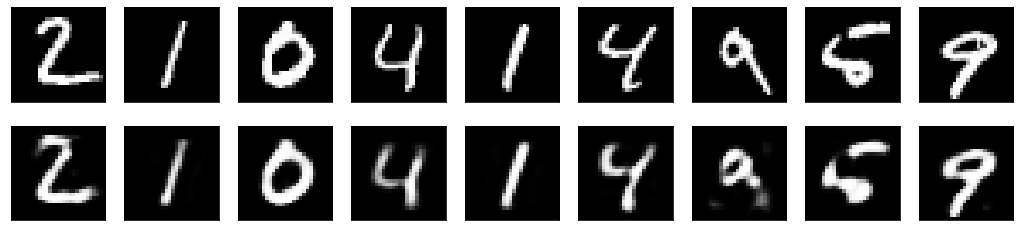

In [15]:
import matplotlib.pyplot as plt
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.astype("float32")/255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [17]:
import keras
from keras import layers
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [18]:
autoencoder.compile(optimizer='adam',
loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size=256, shuffle = True ,
validation_data=(x_test, x_test)) 

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0923 - val_loss: 0.0912

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()